In [89]:
import pandas as pd
import seaborn as sns

In [90]:
df = pd.read_csv("HR_comma_sep.csv")

In [92]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Plotting a Graph Based on Salary and Employee Turnover

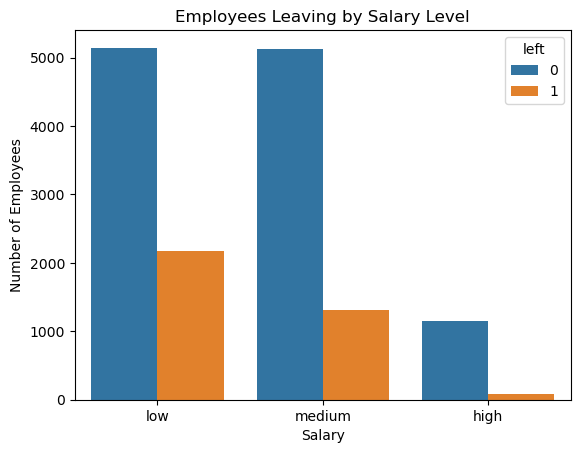

In [126]:
sns.countplot(data=df, x='salary', hue='left')

# Add title and labels
plt.title('Employees Leaving by Salary Level')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')

# Show the plot
plt.show()

### selected the independent variables for prediction

In [94]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


### creating dummy variables for categroical columns

In [108]:
sub_ =pd.get_dummies(subdf['salary'], prefix="salary")

In [109]:
new_df = pd.concat([subdf,sub_],axis='columns')

In [111]:
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,False,True,False
14995,0.37,160,0,low,False,True,False
14996,0.37,143,0,low,False,True,False
14997,0.11,280,0,low,False,True,False


In [113]:
final_df = new_df.drop(['salary_medium','salary'],axis=1)

In [114]:
final_df * 1

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


In [115]:
X = final_df

In [116]:
y = df.left

### LogisticRegression initialization

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
model = LogisticRegression()

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train,X_test,y_train,y_test = train_test_split(final_df,df.left,test_size=0.3)

In [129]:
Y_test

12423    1
8523     0
342      1
13353    0
6575     0
        ..
10431    0
2077     0
10238    0
6256     0
3198     0
Name: left, Length: 4500, dtype: int64

In [130]:
model.fit(X_train,Y_train)

LogisticRegression()

### prediction

In [131]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### accuracy

In [132]:
model.score(X_train,Y_train)

0.759881893513668